<a href="https://colab.research.google.com/github/Banboo-glich/Banboo-glich.github.io/blob/main/Velocity_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DLCのデータから速度と移動距離を求める**
##Reference: [DLC Utils](https://github.com/DeepLabCut/DLCutils)

In [ ]:
!pip install deeplabcut

In [1]:
import deeplabcut

Loading DLC 2.2.1.1...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%precision 3
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# カメラのfpsを入力(動画のfpsではないことに注意)
fps = 30

# pxの実寸の大きさが分かる場合。pxの割合をここに代入
px = 1.

##画像の幅を調べる

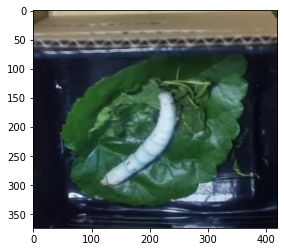

In [5]:
img = mpimg.imread('/content/drive/MyDrive/Deeplabcut/Silkwom_single-MMasaki-2022-07-24/labeled-data/Black/img0043.png')
# img = mpimg.imread(‘/content/drive/MyDrive/Deeplabcut/Silkwom_single-MMasaki-2022-07-24/labeled-data/Black/img0037.png’)
imgplot = plt.imshow(img)

In [6]:
print('画像の(高さ,幅,チャンネル):{}'.format(img.shape))

画像の(高さ,幅,チャンネル):(374, 420, 3)


## 解析したいデータを入力

In [14]:
#絶対パスでdatanameにDLCの結果を格納する
dataname = '/content/drive/MyDrive/Deeplabcut/Silkwom_single-MMasaki-2022-07-24/videos/BlackDLC_resnet50_Silkwom_singleJul24shuffle1_550000.h5'
"scorerを入力"
DLCscorer = 'DLC_resnet50_Silkwom_singleJul24shuffle1_550000'
Dataframe = pd.read_hdf(os.path.join(dataname))
Dataframe.head()

scorer    DLC_resnet50_Silkwom_singleJul24shuffle1_550000              \
bodyparts                                            head               
coords                                                  x           y   
0                                              132.022717  295.585335   
1                                              124.498366  297.706267   
2                                              127.503661  296.925092   
3                                              123.405782  293.565750   
4                                              126.140545  295.661954   

scorer                                                               \
bodyparts                ganzyou                           hirazuki   
coords    likelihood           x           y likelihood           x   
0           0.999977  137.402179  287.591589   0.999994  164.075204   
1           0.973669  129.935806  292.501084   0.993049  164.907437   
2           0.999675  134.119633  290.788217   0.999557  165.938882   
3           0.998800  131.824447  292.204032   0.999392  169.756877   
4           0.996887  133.079427  294.298586   0.999609  168.713283   

scorer                                                               
bodyparts                             oshiri                         
coords              y likelihood           x           y likelihood  
0          254.150540   1.000000  211.035160  134.459968   0.999906  
1          256.118957   0.999949  213.325731  133.498602   0.997629  
2          255.354026   0.999964  211.698913  133.213575   0.994759  
3          268.929024   0.999985  218.855765  158.248332   0.428091  
4          268.920781   0.998808  220.528236  154.039235   0.986603

In [10]:
%cd /content/drive/MyDrive/Deeplabcut

/content/drive/MyDrive/Deeplabcut


In [11]:
import time_in_each_roi

##調べたいbodypartsを選択 

In [12]:
bodyparts = 'hirazuki'

In [15]:
x = Dataframe[DLCscorer][bodyparts]['x'].values
x = np.nan_to_num(x, nan=0)
y = Dataframe[DLCscorer][bodyparts]['y'].values
y = np.nan_to_num(y, nan=0)

## 総合移動距離を求める

In [16]:
#二点の移動距離を連続するフレームから算出する。その合計値(総合移動距離)を出す。
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([x.flatten(), y.flatten()]).T)
distance= np.sum(vel)

print('総合移動距離:{}px'.format(distance))

総合移動距離:116399.18871022601px


## 平均速度を求める

In [17]:
# 2点の距離をfpsで割り、速度を出す
vel_av = np.average(vel*px/fps)
print('平均速度:{}px/s'.format(vel_av))

平均速度:0.6708113687772361px/s


In [18]:
bpt=bodyparts
# 時間を定義
time=np.arange(len(vel))
vel=vel #notice the units of vel are relative pixel distance [per time step]


##フレームごとに速度をプロットする

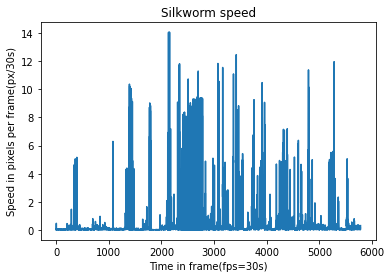

In [19]:
%matplotlib inline

plt.plot(time,vel*px/fps)
plt.title('Silkworm speed')
plt.xlabel('Time in frame(fps=30s)')
plt.ylabel('Speed in pixels per frame(px/30s)')
plt.show()

##速度のヒストグラムを表示

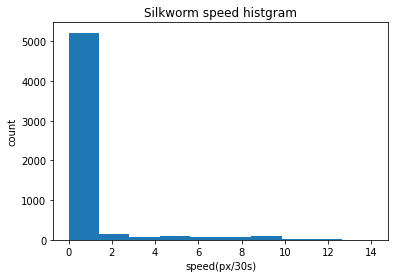

In [20]:
plt.hist(vel*px/fps)
plt.title('Silkworm speed histgram')
plt.xlabel('speed(px/30s)')
plt.ylabel('count')
plt.show()

##箱ひげ図

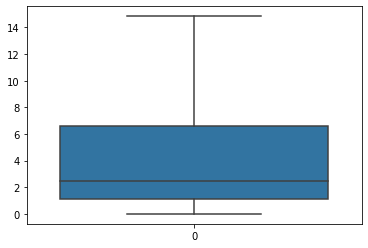

In [42]:
boxplot_vel = pd.DataFrame(vel)
sns.boxplot(data=boxplot_vel, showfliers=False)
# sns.stripplot(data=boxplot_vel, color='black')

boxplot_vel = pd.DataFrame(vel)

# fig = plt.figure(figsize=(4,4))
# axes = fig.add_axes([0,.05,.8,.8])

# #generate the boxplot
# axes = sns.boxplot(x = 'experiment type', y = 'number of turns', data = df2boxplot, showfliers = True, fliersize = 1)

# #add individual data points to the boxplot 
# axes = sns.swarmplot(x = 'experiment type', y = "number of turns", data = df2boxplot, color = ".25")

##Time spent of a body part in a particular region of interest (ROI)



In [40]:
np.max(boxplot_vel)

0    421.993424
dtype: float64

In [99]:
#define bounding boxes (here for left and right side of treadmill, displayed below)
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
bp_tracking = np.array((x, y, vel))

{'leftside': position(topleft=(0, 400), bottomright=(200, -20)), 'rightside': position(topleft=(200, 400), bottomright=(400, -20))}


##ROIを定義する

In [ ]:
#two points defining each roi: topleft(X,Y) and bottomright(X,Y).
rois = {'leftside': position((0, 400), (200, -20)),'rightside': position((200, 400), (400, -20))} 
print(rois)

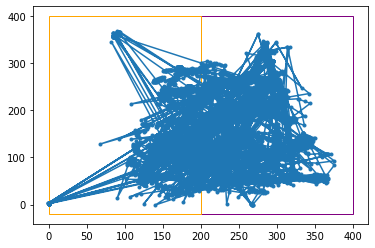

In [65]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

#plot snout + bounding boxes for rois
plt.plot(x,y,'.-')

rect = patches.Rectangle(rois['rightside'].topleft,rois['rightside'].bottomright[0]-rois['rightside'].topleft[0],rois['rightside'].bottomright[1]-rois['rightside'].topleft[1],linewidth=1,edgecolor='purple',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle(rois['leftside'].topleft,rois['leftside'].bottomright[0]-rois['leftside'].topleft[0],rois['leftside'].bottomright[1]-rois['leftside'].topleft[1],linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
# plt.ylim(-10,400)
plt.show()

In [95]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

res = time_in_each_roi.get_timeinrois_stats(bp_tracking.T, rois, fps=fps)
res = pd.DataFrame(res)
res

/content/time_in_each_roi.py:142: UserWarning: Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.
  warnings.warn("Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.")


,transitions_per_roi,cumulative_time_in_roi,cumulative_time_in_roi_sec,avg_time_in_roi,avg_time_in_roi_sec,avg_vel_in_roi
leftside,178,2380,79.333333,13.370787,0.445693,16.946233
rightside,178,3404,113.466667,19.123596,0.637453,22.346402
tot,356,5784,192.800000,32.494382,1.083146,39.292636


##教師なし学習でクラスタリングしてみる

In [105]:
#SVMのライブラリー
from sklearn.svm import LinearSVC

#訓練データとテストデータを分けるライブラリー
from sklearn.model_selection import train_test_split


In [107]:
Data = Dataframe[DLCscorer][bodyparts]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    Data, Data, stratify=,random_state=0
)

In [ ]:
# Data.target

In [112]:
from sklearn.datasets import load_breast_cancer

In [117]:
cancer = load_breast_cancer()

In [ ]:
cancer

In [121]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn
%precision 3


'%.3f'

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

